Фаза 2 • Неделя 8 • Понедельник
Нейронные сети
🔥 PyTorch

Оценка стоимости недвижимости с применением нейронных сетей
Загрузите датасет House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques) с прошлой недели: датасет должен быть предобработанный:

в нем должны отсутствовать пропуски
данные обязательно должны быть нормализованы
целевая переменная должна быть логарифмирована
в TensorDataset передаем только массив, а не DataFrame

In [ ]:
# !pip install git+https://github.com/anjandeepsahni/torchutils.git

  Cloning https://github.com/anjandeepsahni/torchutils.git to /tmp/pip-req-build-64_aec68
  Running command git clone --filter=blob:none --quiet https://github.com/anjandeepsahni/torchutils.git /tmp/pip-req-build-64_aec68
  Resolved https://github.com/anjandeepsahni/torchutils.git to commit 6e2dcdb6a2b18b4e650fd738fecda779fe1822df
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import numpy as np
import torch
import torchutils as tu

from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# 1. Загружаем train.csv
df = pd.read_csv('/content/drive/MyDrive/ds-phase-2/Неделя_1/пн/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
print(df.isnull().sum())
print(f"Всего пропусков: {df.isnull().sum().sum()}")

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Всего пропусков: 7829


In [ ]:
# Для числовых колонок
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    median = df[col].median()
    df[col] = df[col].fillna(median)

cat_cols = df.select_dtypes(include=['object']).columns

# Для категориальных колонок
for col in cat_cols:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

In [ ]:
print(df.isnull().sum())
print(f"Всего пропусков: {df.isnull().sum().sum()}")

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
Всего пропусков: 0


In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


In [ ]:
#Логарифмируем целевую переменную 'SalePrice'
df['SalePrice'] = np.log1p(df['SalePrice'])

In [ ]:
#Выбираем числовые признаки, исключаем целевую
features = df.select_dtypes(include=[np.number]).columns.drop('SalePrice')

In [ ]:
X = df[features].values
y = df['SalePrice'].values

In [ ]:
X.shape

(1460, 37)

In [ ]:
y.shape

(1460,)

In [ ]:
# Нормализация признаков
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Разбиваем на train и valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

3. Импортируй `TensorDataset` и `DataLoader` и создай датасет для обучения модели.


In [ ]:
#Создаем TensorDataset и DataLoader
train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
valid_ds = TensorDataset(torch.tensor(X_valid, dtype=torch.float32), torch.tensor(y_valid, dtype=torch.float32))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
valid_loader = DataLoader(valid_ds, batch_size=128)

In [ ]:
n_features = X.shape[1]

1. С использованием библиотеки pytorch задай нейронную сеть по следующей схеме:
- На первом слое 128 нейронов с активацией relu
- На втором слое 64 нейрона с активацией relu
- На третьем слое дропаут с аргументом 0.5
- Выходной слой из 1 нейрона


In [ ]:
#Определяем модель
model = nn.Sequential(
    nn.Linear(n_features, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(64, 1)
)

2. Вызови `tu.get_model_summary` модели

In [ ]:
tu.get_model_summary(model, torch.randn(32, n_features))

Layer    Kernel      Output     Params     FLOPs
0_0     [37, 128]   [32, 128]    4,864   299,008
1_1             -   [32, 128]        0         0
2_2     [128, 64]    [32, 64]    8,256   522,240
3_3             -    [32, 64]        0         0
4_4             -    [32, 64]        0         0
5_5       [64, 1]     [32, 1]       65     4,064
Total params: 13,185
Trainable params: 13,185
Non-trainable params: 0
Total FLOPs: 825,312 / 825.31 KFLOPs
------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.11
Params size (MB): 0.05
Estimated Total Size (MB): 0.16


4. Создай оптимизатор и задай функцию потерь (она не может быть той же, что и в демо-файле)


In [ ]:
# Оптимизатор и функция потерь для регрессии (MSE)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [ ]:
# #Цикл обучения
# def fit_model(model, train_loader, valid_loader, criterion, optimizer, epochs=10):
#     train_losses, valid_losses = [], []
#     for epoch in range(epochs):
#         model.train()
#         train_loss_epoch = []
#         for xb, yb in train_loader:
#             optimizer.zero_grad()
#             preds = model(xb).squeeze(-1)
#             loss = criterion(preds, yb)
#             loss.backward()
#             optimizer.step()
#             train_loss_epoch.append(loss.item())

#         model.eval()
#         valid_loss_epoch = []
#         with torch.inference_mode():
#             for xb, yb in valid_loader:
#                 preds = model(xb).squeeze(-1)
#                 loss = criterion(preds, yb)
#                 valid_loss_epoch.append(loss.item())

#         train_loss = np.mean(train_loss_epoch)
#         valid_loss = np.mean(valid_loss_epoch)
#         train_losses.append(train_loss)
#         valid_losses.append(valid_loss)
#         print(f"Epoch {epoch+1}: Train loss {train_loss:.4f}, Valid loss {valid_loss:.4f}")

#     return train_losses, valid_losses

5. Запусти обучение на 10 эпох и нарисуй кривые обучения и кривые изменения метрик. Не забудь переводить модель в режимы train и eval. Не забудь о том, что метрика на этот раз должна быть регрессионной, а не классификационной (как в демо файле)

In [ ]:
def fit_model(model, train_loader, valid_loader, criterion, optimizer, epochs=10):
    train_losses, valid_losses = [], []

    for epoch in range(epochs):
        model.train()
        train_loss_epoch = []
        train_preds_all = []
        train_targets_all = []

        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb).squeeze(-1)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            train_loss_epoch.append(loss.item())

            train_preds_all.append(preds.detach())
            train_targets_all.append(yb)

        model.eval()
        valid_loss_epoch = []
        valid_preds_all = []
        valid_targets_all = []
        with torch.inference_mode():
            for xb, yb in valid_loader:
                preds = model(xb).squeeze(-1)
                loss = criterion(preds, yb)
                valid_loss_epoch.append(loss.item())

                valid_preds_all.append(preds)
                valid_targets_all.append(yb)

        train_loss = np.mean(train_loss_epoch)
        valid_loss = np.mean(valid_loss_epoch)

        # Собираем все предсказания и цели в один тензор
        train_preds_all = torch.cat(train_preds_all)
        train_targets_all = torch.cat(train_targets_all)
        valid_preds_all = torch.cat(valid_preds_all)
        valid_targets_all = torch.cat(valid_targets_all)

        # Считаем RMSE и MAE для train и valid
        train_rmse = torch.sqrt(torch.mean((train_preds_all - train_targets_all) ** 2)).item()
        valid_rmse = torch.sqrt(torch.mean((valid_preds_all - valid_targets_all) ** 2)).item()
        train_mae = torch.mean(torch.abs(train_preds_all - train_targets_all)).item()
        valid_mae = torch.mean(torch.abs(valid_preds_all - valid_targets_all)).item()

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        print(f"Epoch {epoch+1}: Train loss {train_loss:.4f}, Valid loss {valid_loss:.4f}, "
              f"Train RMSE {train_rmse:.4f}, Valid RMSE {valid_rmse:.4f}, "
              f"Train MAE {train_mae:.4f}, Valid MAE {valid_mae:.4f}")

    return train_losses, valid_losses

In [ ]:
def evaluate_model(model, data_loader):
    model.eval()
    preds = []
    targets = []
    with torch.inference_mode():
        for xb, yb in data_loader:
            pred = model(xb).squeeze(-1)
            preds.append(pred)
            targets.append(yb)
    preds = torch.cat(preds)
    targets = torch.cat(targets)
    return preds, targets

In [ ]:
train_losses, valid_losses = fit_model(model, train_loader, valid_loader, criterion, optimizer, epochs=10)

Epoch 1: Train loss 138.8627, Valid loss 130.9731, Train RMSE 11.7845, Valid RMSE 11.4314, Train MAE 11.7754, Valid MAE 11.4224
Epoch 2: Train loss 124.9545, Valid loss 116.2288, Train RMSE 11.1789, Valid RMSE 10.7679, Train MAE 11.1658, Valid MAE 10.7525
Epoch 3: Train loss 109.2553, Valid loss 97.4298, Train RMSE 10.4532, Valid RMSE 9.8577, Train MAE 10.4246, Valid MAE 9.8239
Epoch 4: Train loss 88.1228, Valid loss 73.7111, Train RMSE 9.3886, Valid RMSE 8.5734, Train MAE 9.3198, Valid MAE 8.5094
Epoch 5: Train loss 63.7349, Valid loss 47.3118, Train RMSE 7.9849, Valid RMSE 6.8679, Train MAE 7.8142, Valid MAE 6.6839
Epoch 6: Train loss 39.4801, Valid loss 24.7147, Train RMSE 6.2848, Valid RMSE 4.9664, Train MAE 5.8972, Valid MAE 4.5386
Epoch 7: Train loss 21.9097, Valid loss 13.3911, Train RMSE 4.6820, Valid RMSE 3.6727, Train MAE 4.1119, Valid MAE 3.0317
Epoch 8: Train loss 16.7885, Valid loss 11.2025, Train RMSE 4.0972, Valid RMSE 3.3840, Train MAE 3.2704, Valid MAE 2.5500
Epoch 9: 

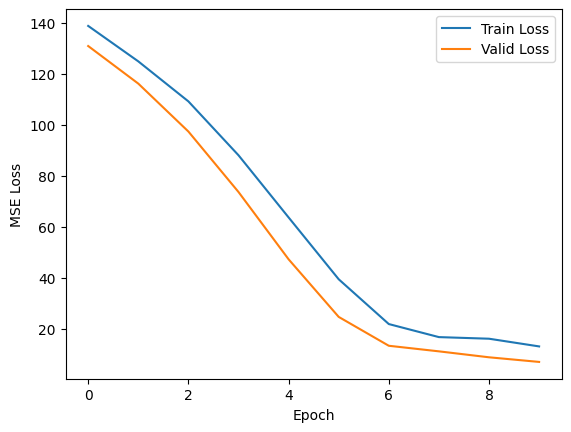

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
# После обучения модели
valid_preds, valid_targets = evaluate_model(model, valid_loader)

# Теперь считаем RMSE и MAE
def rmse(preds, targets):
    return torch.sqrt(torch.mean((preds - targets) ** 2)).item()

def mae(preds, targets):
    return torch.mean(torch.abs(preds - targets)).item()

final_rmse = rmse(valid_preds, valid_targets)
final_mae = mae(valid_preds, valid_targets)

print(f"Final Validation RMSE: {final_rmse:.4f}")
print(f"Final Validation MAE: {final_mae:.4f}")

Final Validation RMSE: 2.7011
Final Validation MAE: 2.0088


Измени архитектуру модели и улучши результат:
- измени число нейронов
- попробуй использовать сигмоидную функцию активации: nn.Sigmoid
- измени число слоев
- поэкспериментируй с активационными функциями и дропаутом

In [ ]:
model2 = nn.Sequential(
    nn.Linear(n_features, 256),
    nn.Sigmoid(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.Sigmoid(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.Sigmoid(),
    nn.Linear(64, 1)
)

tu.get_model_summary(model2, torch.randn(32, n_features))

Layer     Kernel      Output     Params       FLOPs
0_0      [37, 256]   [32, 256]    9,728     598,016
1_1              -   [32, 256]        0      32,768
2_2              -   [32, 256]        0           0
3_3     [256, 128]   [32, 128]   32,896   2,093,056
4_4              -   [32, 128]        0      16,384
5_5              -   [32, 128]        0           0
6_6      [128, 64]    [32, 64]    8,256     522,240
7_7              -    [32, 64]        0       8,192
8_8        [64, 1]     [32, 1]       65       4,064
Total params: 50,945
Trainable params: 50,945
Non-trainable params: 0
Total FLOPs: 3,274,720 / 3.27 MFLOPs
---------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.31
Params size (MB): 0.19
Estimated Total Size (MB): 0.51


In [ ]:
optimizer = optim.Adam(model2.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [ ]:
train_losses, valid_losses = fit_model(model2, train_loader, valid_loader, criterion, optimizer, epochs=25)

Epoch 1: Train loss 8.5260, Valid loss 7.9962, Train RMSE 2.9200, Valid RMSE 2.8154, Train MAE 2.8930, Valid MAE 2.7851
Epoch 2: Train loss 7.6376, Valid loss 7.1571, Train RMSE 2.7638, Valid RMSE 2.6629, Train MAE 2.7351, Valid MAE 2.6309
Epoch 3: Train loss 6.8331, Valid loss 6.3988, Train RMSE 2.6141, Valid RMSE 2.5172, Train MAE 2.5841, Valid MAE 2.4833
Epoch 4: Train loss 6.1048, Valid loss 5.7134, Train RMSE 2.4709, Valid RMSE 2.3779, Train MAE 2.4389, Valid MAE 2.3420
Epoch 5: Train loss 5.4472, Valid loss 5.0954, Train RMSE 2.3341, Valid RMSE 2.2449, Train MAE 2.3004, Valid MAE 2.2068
Epoch 6: Train loss 4.8553, Valid loss 4.5378, Train RMSE 2.2036, Valid RMSE 2.1178, Train MAE 2.1677, Valid MAE 2.0774
Epoch 7: Train loss 4.3220, Valid loss 4.0364, Train RMSE 2.0791, Valid RMSE 1.9967, Train MAE 2.0410, Valid MAE 1.9538
Epoch 8: Train loss 3.8412, Valid loss 3.5859, Train RMSE 1.9600, Valid RMSE 1.8813, Train MAE 1.9198, Valid MAE 1.8357
Epoch 9: Train loss 3.4087, Valid loss 3

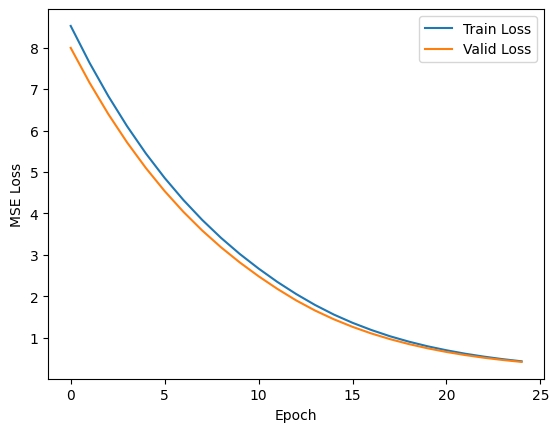

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
# После обучения модели
valid_preds, valid_targets = evaluate_model(model2, valid_loader)

# Теперь считаем RMSE и MAE
def rmse(preds, targets):
    return torch.sqrt(torch.mean((preds - targets) ** 2)).item()

def mae(preds, targets):
    return torch.mean(torch.abs(preds - targets)).item()

final_rmse = rmse(valid_preds, valid_targets)
final_mae = mae(valid_preds, valid_targets)

print(f"Final Validation RMSE: {final_rmse:.4f}")
print(f"Final Validation MAE: {final_mae:.4f}")

Final Validation RMSE: 0.6315
Final Validation MAE: 0.5246
